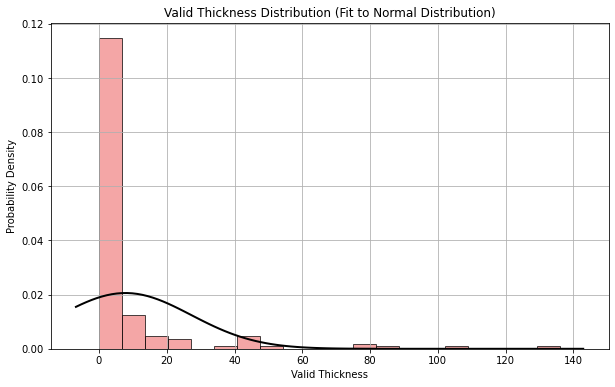

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 创建一个空的列表，用于存储所有数据框
dfs = []

# 循环读取多个文件
for i in range(1,15):  # 假设有100个文件，你可以根据实际情况修改这个数字
    filename = f"./sensor-data/{i:02d}.tsv"  # 格式化文件名，比如从 0 到 99
    df = pd.read_csv(filename, sep='\t')  # 读取文件
    dfs.append(df)  # 将数据框添加到列表中

# 合并所有数据框
merged_df = pd.concat(dfs, ignore_index=True)

# 删除合并后数据框的最后一列
merged_df = merged_df.iloc[:, :-1]

# 提取深度、孔隙度和饱和度列
depth = merged_df.iloc[:, 0]
porosity = merged_df.iloc[:, 1]
saturation = merged_df.iloc[:, 2]


# 计算有效厚度
valid_thickness = []

flag=True

for i in range(len(depth)):
    if abs(porosity[i] * saturation[i]) < 1 and porosity[i] * saturation[i] != 0:
        if flag:
            first_depth = depth[i]
            flag = False
    elif flag == False:
        last_depth = depth[i-1]
        valid_thickness.append(last_depth - first_depth)
        flag = True
        

# 拟合正态分布曲线
mu, std = norm.fit(valid_thickness)

# 绘制直方图
plt.figure(figsize=(10, 6))
plt.hist(valid_thickness, bins=20, density=True, alpha=0.7, color='lightcoral', edgecolor='black')

# 绘制拟合的正态分布曲线
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# 添加标题、标签和网格
plt.title('Valid Thickness Distribution (Fit to Normal Distribution)')
plt.xlabel('Valid Thickness')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

[0.80831533 0.79740821 0.80334773 ... 0.41825054 0.4187905  0.4163067 ]
(15969,)


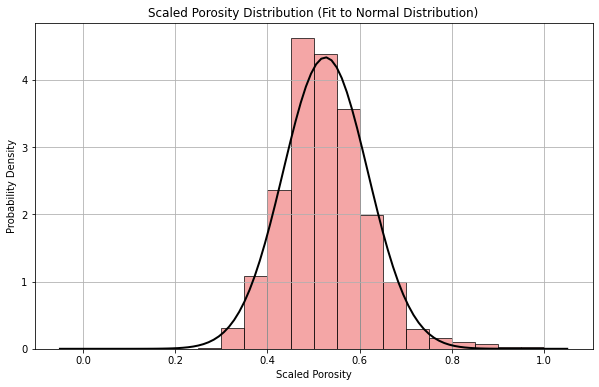

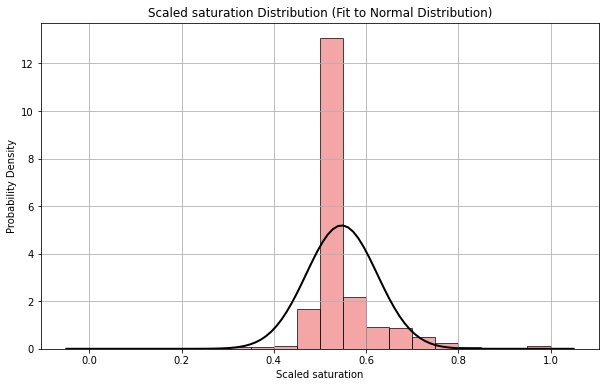

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler

# 创建一个空的列表，用于存储所有数据框
dfs = []

# 循环读取多个文件
for i in range(1,15):  # 假设有100个文件，你可以根据实际情况修改这个数字
    filename = f"./sensor-data/{i:02d}.tsv"  # 格式化文件名，比如从 0 到 99
    df = pd.read_csv(filename, sep='\t')  # 读取文件
    dfs.append(df)  # 将数据框添加到列表中

# 合并所有数据框
merged_df = pd.concat(dfs, ignore_index=True)

# 删除合并后数据框的最后一列
merged_df = merged_df.iloc[:, :-1]

# 提取孔隙度和饱和度列
depth = merged_df.iloc[:, 0]
porosity = merged_df.iloc[:, 1]
saturation = merged_df.iloc[:, 2]

# 过滤掉绝对值大于1的数据
filtered_porosity = porosity[abs(porosity) <= 1]
filtered_saturation = saturation[abs(saturation) <= 1]


# 将数据转换为二维数组
filtered_porosity_2d = filtered_porosity.values.reshape(-1, 1)
filtered_saturation_2d = filtered_saturation.values.reshape(-1, 1)

# 创建MinMaxScaler对象
scaler = MinMaxScaler()

# 对数据进行缩放
scaled_porosity = scaler.fit_transform(filtered_porosity_2d)
scaled_saturation = scaler.fit_transform(filtered_saturation_2d)

# 将缩放后的数据转换为一维数组
scaled_porosity_1d = scaled_porosity.flatten()
scaled_saturation_1d = scaled_saturation.flatten()

# # 打印缩放后的孔隙度数据
# print(scaled_porosity_1d)
# print(scaled_saturation_1d.shape)


# 使用正态分布拟合缩放后的数据
mu, std = norm.fit(scaled_porosity_1d)

# 绘制直方图
plt.figure(figsize=(10, 6))
plt.hist(scaled_porosity_1d, bins=20, density=True, alpha=0.7, color='lightcoral', edgecolor='black')

# 绘制拟合的正态分布曲线
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# 添加标题、标签和网格
plt.title('Scaled Porosity Distribution (Fit to Normal Distribution)')
plt.xlabel('Scaled Porosity')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()




# 使用正态分布拟合缩放后的数据
mu, std = norm.fit(scaled_saturation_1d)

# 绘制直方图
plt.figure(figsize=(10, 6))
plt.hist(scaled_saturation_1d, bins=20, density=True, alpha=0.7, color='lightcoral', edgecolor='black')

# 绘制拟合的正态分布曲线
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# 添加标题、标签和网格
plt.title('Scaled saturation Distribution (Fit to Normal Distribution)')
plt.xlabel('Scaled saturation')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()